# Data preprocessing for predicting housing price

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding_data_files/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


There are no null values in this dataset as we can see.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Convert the categorical values to numerical ones.

In [ ]:
df = pd.get_dummies(df, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'], dtype=int, drop_first=True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


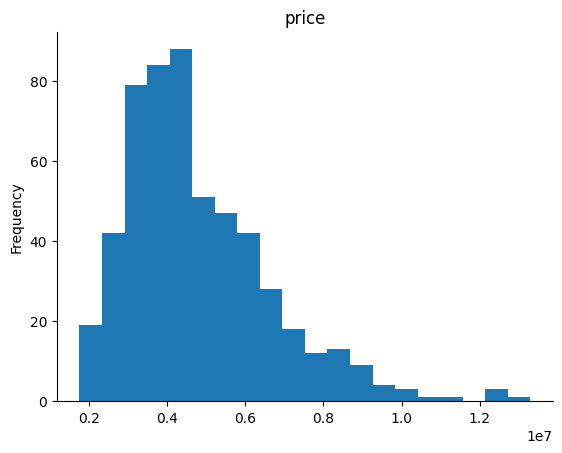

In [ ]:
# @title price

from matplotlib import pyplot as plt
df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

The distribution of the price is quite right-skewed, so it needs to me modified to make it normal distribution.

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [ ]:
from scipy import stats

original_skewness = df.price.skew()
print(f"Original skewness: {original_skewness:.4f}")

transformed_target = df.price.copy()

Original skewness: 1.2122


Using `np.log1p` to transform the right-skewed target variable into normalized distribution.

In [ ]:
if all(transformed_target > 0):
        transformed_target_log = np.log1p(transformed_target) # Using log1p to handle potential zeros
        log_skewness = transformed_target_log.skew()
        print(f"Skewness after log transformation: {log_skewness:.4f}")
        if abs(log_skewness) < abs(original_skewness):
            transformed_target = transformed_target_log
            original_skewness = log_skewness
        else:
            print("Log transformation did not improve skewness.")
else:
    print("Cannot apply log transformation as the series contains non-positive values.")

Skewness after log transformation: 0.1409


Now let's see if that worked well by using a histoplot. The calculation and the diagram can also show that it has a normal distribution now.

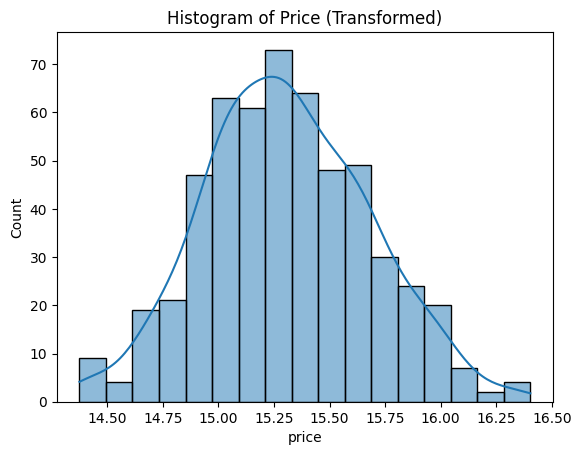

In [ ]:
df['price'] = transformed_target
sns.histplot(df['price'], kde=True)
plt.title('Histogram of Price (Transformed)')
plt.show()


--- Checking outliers for column: price ---


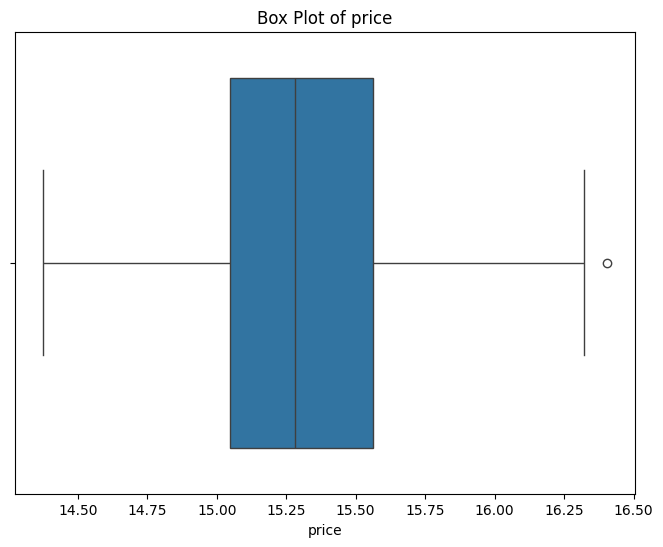

Outliers identified by Box Plot (values outside the whiskers):
[16.40327467]

--- Checking outliers for column: area ---


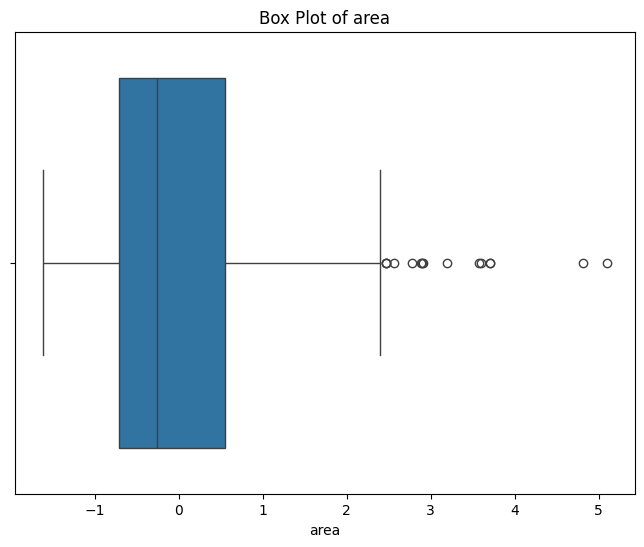

Outliers identified by Box Plot (values outside the whiskers):
[5.09626319 3.71259454 2.90084227 2.77861821 3.71259454 3.20063714
 2.46729276 4.81952946 2.91006673 2.46729276 2.46729276 2.88700559
 2.55953734 3.57422768 3.59452149]

--- Checking outliers for column: bedrooms ---


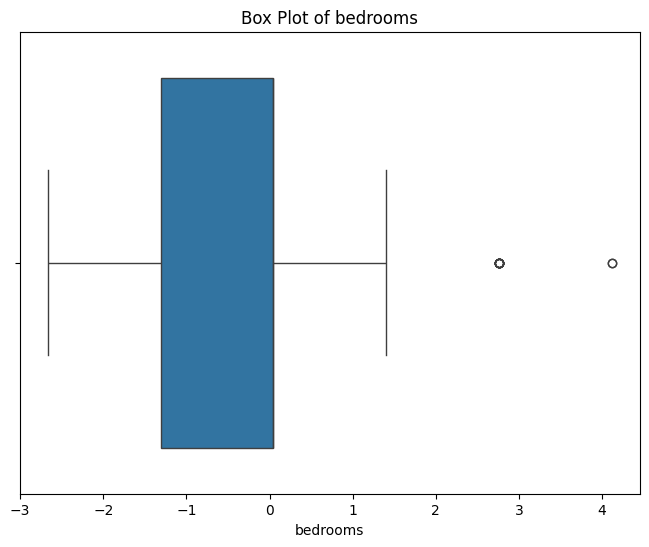

Outliers identified by Box Plot (values outside the whiskers):
[2.7595604  2.7595604  2.7595604  2.7595604  4.11570145 2.7595604
 2.7595604  2.7595604  2.7595604  2.7595604  4.11570145 2.7595604 ]

--- Checking outliers for column: bathrooms ---


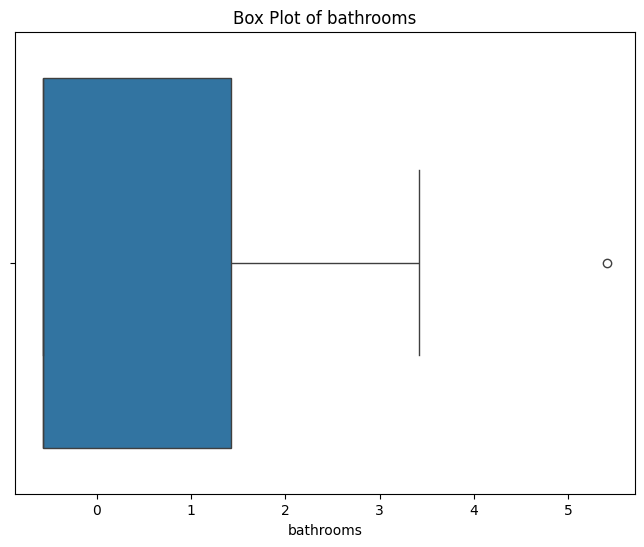

Outliers identified by Box Plot (values outside the whiskers):
[5.40580863]

--- Checking outliers for column: stories ---


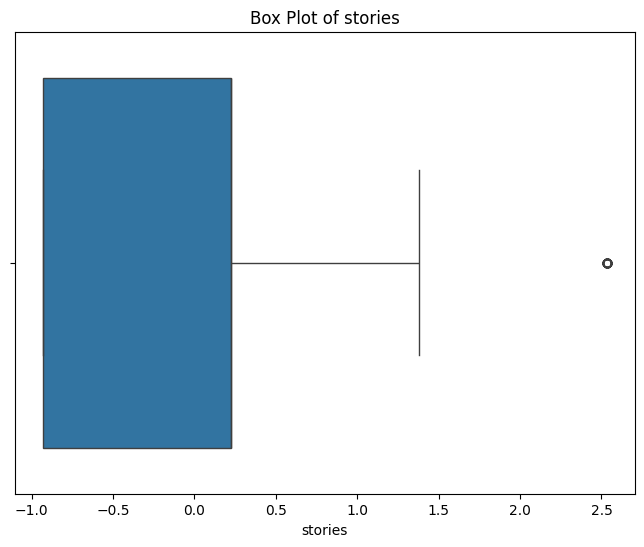

Outliers identified by Box Plot (values outside the whiskers):
[2.53202371 2.53202371 2.53202371 2.53202371 2.53202371 2.53202371
 2.53202371 2.53202371 2.53202371 2.53202371 2.53202371 2.53202371
 2.53202371 2.53202371 2.53202371 2.53202371 2.53202371 2.53202371
 2.53202371 2.53202371 2.53202371 2.53202371 2.53202371 2.53202371
 2.53202371 2.53202371 2.53202371 2.53202371 2.53202371 2.53202371
 2.53202371 2.53202371 2.53202371 2.53202371 2.53202371 2.53202371
 2.53202371 2.53202371 2.53202371 2.53202371 2.53202371]

--- Checking outliers for column: parking ---


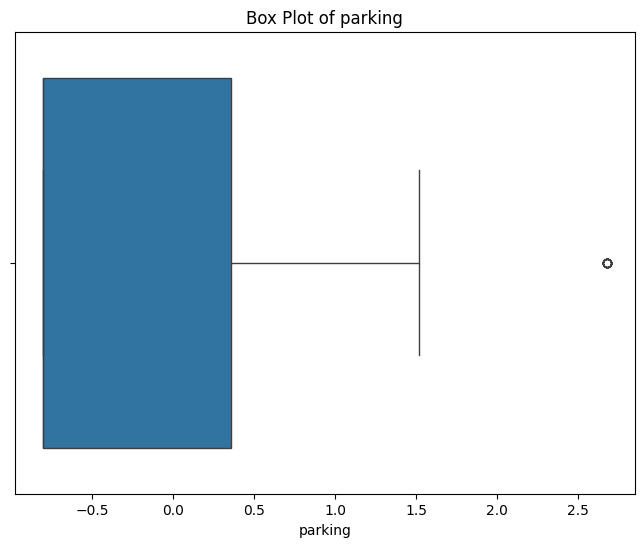

Outliers identified by Box Plot (values outside the whiskers):
[2.67940935 2.67940935 2.67940935 2.67940935 2.67940935 2.67940935
 2.67940935 2.67940935 2.67940935 2.67940935 2.67940935 2.67940935]

--- Checking outliers for column: mainroad_yes ---


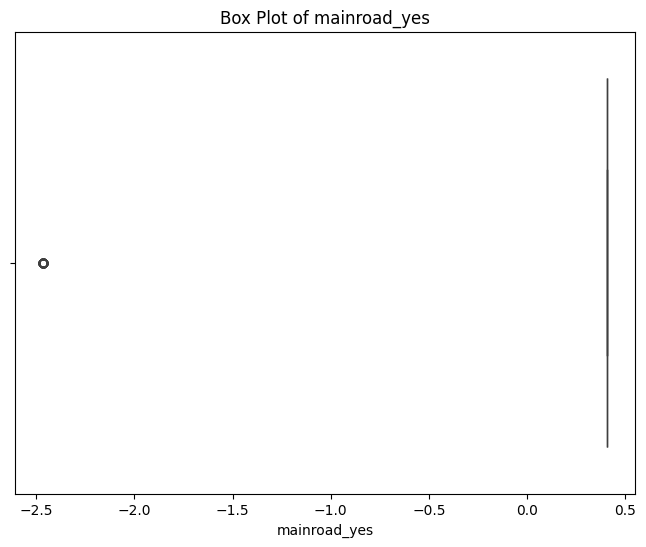

Outliers identified by Box Plot (values outside the whiskers):
[-2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421
 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421
 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421
 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421
 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421
 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421
 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421
 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421
 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421
 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421
 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421
 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421
 -2.46534421 -2.46534421 -2.46534421 -2.46534421 -2.46534421]

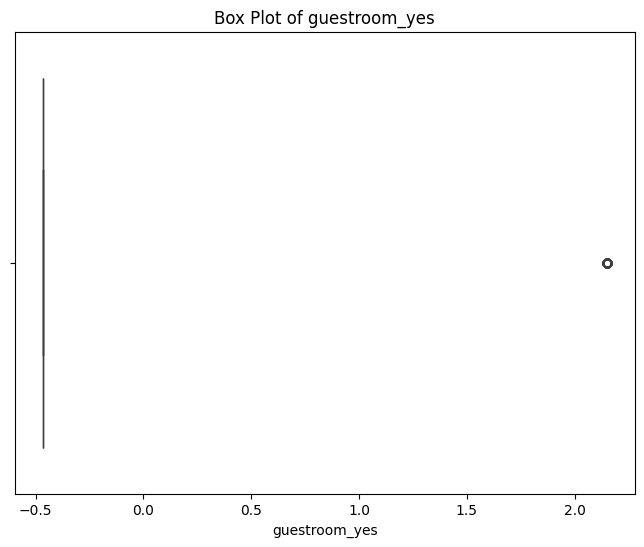

Outliers identified by Box Plot (values outside the whiskers):
[2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276
 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276 2.14908276

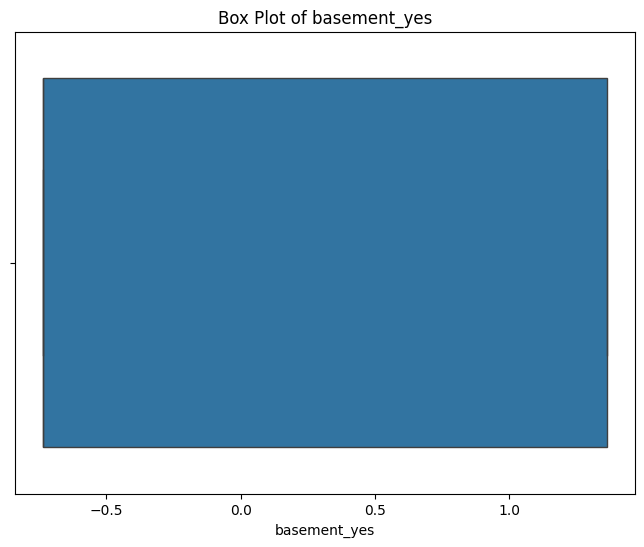

Outliers identified by Box Plot (values outside the whiskers):
[]

--- Checking outliers for column: hotwaterheating_yes ---


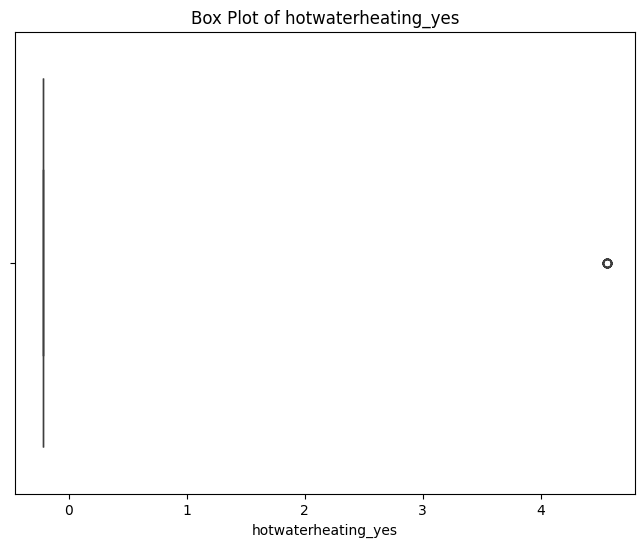

Outliers identified by Box Plot (values outside the whiskers):
[4.5607017 4.5607017 4.5607017 4.5607017 4.5607017 4.5607017 4.5607017
 4.5607017 4.5607017 4.5607017 4.5607017 4.5607017 4.5607017 4.5607017
 4.5607017 4.5607017 4.5607017 4.5607017 4.5607017 4.5607017 4.5607017
 4.5607017 4.5607017 4.5607017 4.5607017]

--- Checking outliers for column: airconditioning_yes ---


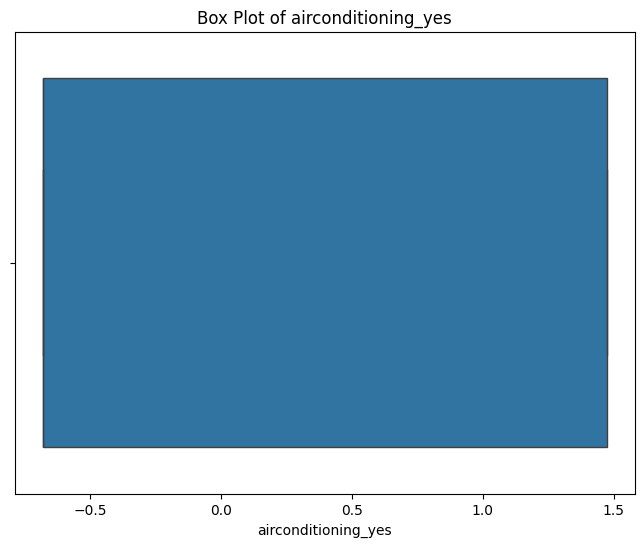

Outliers identified by Box Plot (values outside the whiskers):
[]

--- Checking outliers for column: prefarea_yes ---


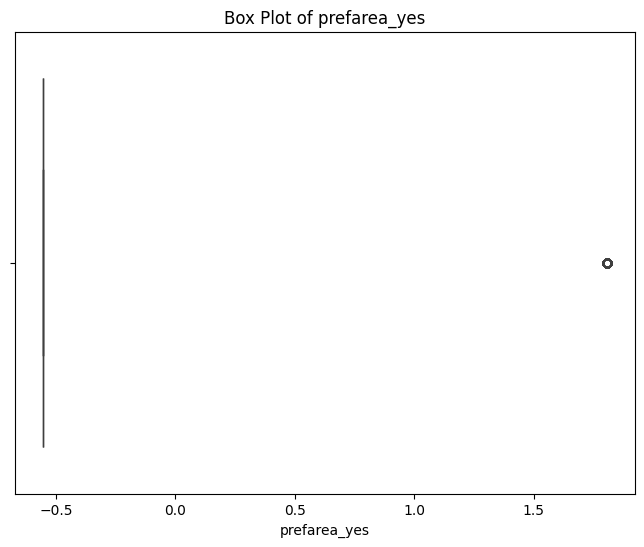

Outliers identified by Box Plot (values outside the whiskers):
[1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113
 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113 1.80494113

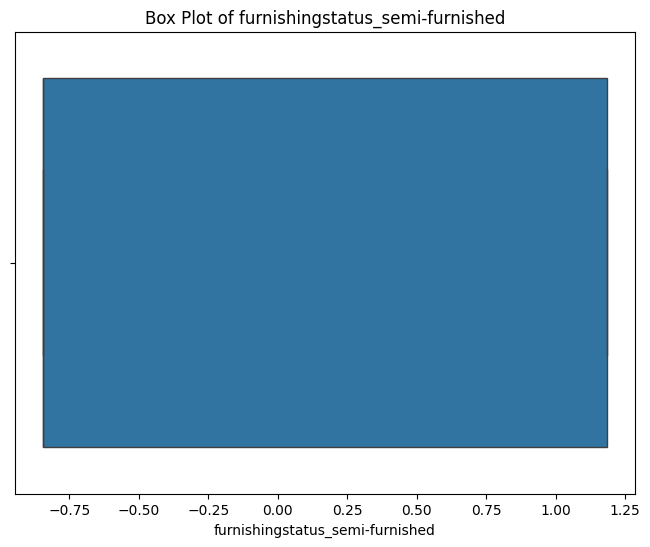

Outliers identified by Box Plot (values outside the whiskers):
[]

--- Checking outliers for column: furnishingstatus_unfurnished ---


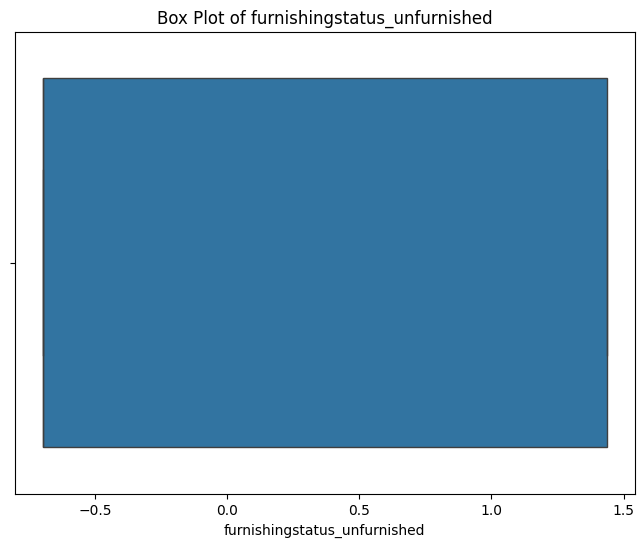

Outliers identified by Box Plot (values outside the whiskers):
[]


In [ ]:
# Removing outliers
def check_for_outliers(df):
    numerical_cols = df.select_dtypes(include=np.number).columns

    for col in numerical_cols:
        print(f"\n--- Checking outliers for column: {col} ---")

        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()
        print("Outliers identified by Box Plot (values outside the whiskers):")
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].values
        print(outliers_iqr)

check_for_outliers(df)

Reducing the weight of outliers in some input features, where there are significant outliers.

In [ ]:
def winsorize_series(series, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    winsorized_series = series.clip(lower=lower_bound, upper=upper_bound) # clip method cuts off the two ends of the feature
    return winsorized_series

In [ ]:
df['area'] = winsorize_series(df['area'])
df['bedrooms'] = winsorize_series(df['bedrooms'])

Checking the result of the removal of outliers.

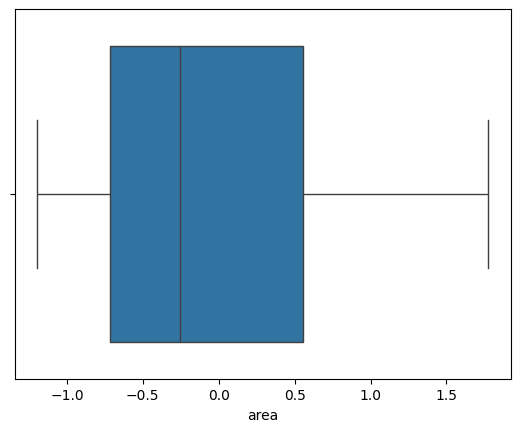

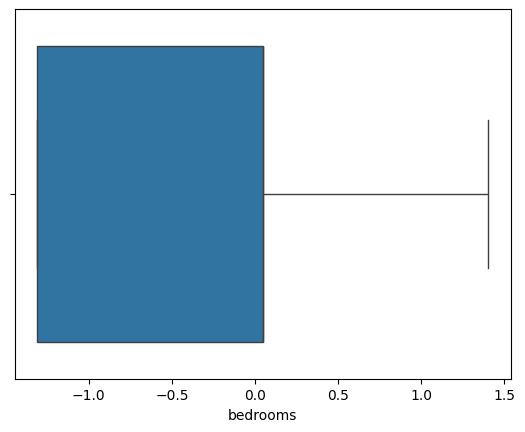

In [ ]:
sns.boxplot(x=df['area'])
plt.show()
plt.clf()

sns.boxplot(x=df['bedrooms'])
plt.show()

# Training the Linear Regression model

This followings are to scale the features to become more equal, while making sure the target column is not part of the batch.

In [ ]:
y = df['price']
X = df.drop('price', axis=1)

In [ ]:
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

if 'price' in numerical_cols:
    numerical_cols.remove('price')

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

This is to check the correlation between my target variable and the features, so I could see which features influence the outcome the most significantly.

In [ ]:
correlations = df.corr()['price'].abs().sort_values(ascending=False)
print(correlations)

price                              1.000000
area                               0.576226
bathrooms                          0.485715
airconditioning_yes                0.455159
stories                            0.415281
bedrooms                           0.386899
parking                            0.371638
prefarea_yes                       0.340557
furnishingstatus_unfurnished       0.337825
mainroad_yes                       0.330041
guestroom_yes                      0.277047
basement_yes                       0.218401
furnishingstatus_semi-furnished    0.120211
hotwaterheating_yes                0.088968
Name: price, dtype: float64


Based on the results of the correlations, I only keep the features above 0.1.

In [ ]:
relevant_features = correlations[correlations > .1].index.tolist()
if 'price' in relevant_features:
  relevant_features.remove('price')

print(relevant_features)

['area', 'bathrooms', 'airconditioning_yes', 'stories', 'bedrooms', 'parking', 'prefarea_yes', 'furnishingstatus_unfurnished', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'furnishingstatus_semi-furnished']


In [ ]:
X = X[['area', 'bathrooms', 'airconditioning_yes', 'stories', 'parking', 'bedrooms', 'prefarea_yes', 'mainroad_yes', 'furnishingstatus_unfurnished', 'guestroom_yes', 'basement_yes']]
y = df['price']
X.head()

,area,bathrooms,airconditioning_yes,stories,parking,bedrooms,prefarea_yes,mainroad_yes,furnishingstatus_unfurnished,guestroom_yes,basement_yes
0,1.280293,1.421812,1.472618,1.378217,1.517692,1.582012,1.804941,0.405623,-0.696429,-0.465315,-0.734539
1,2.117708,5.405809,1.472618,2.532024,2.679409,1.582012,-0.554035,0.405623,-0.696429,-0.465315,-0.734539
2,2.139459,1.421812,-0.679063,0.224410,1.517692,0.085143,1.804941,0.405623,-0.696429,-0.465315,1.361397
3,1.323795,1.421812,1.472618,0.224410,2.679409,1.582012,1.804941,0.405623,-0.696429,-0.465315,1.361397
4,1.280293,-0.570187,1.472618,0.224410,1.517692,1.582012,-0.554035,0.405623,-0.696429,2.149083,1.361397


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42)
regr_model = LinearRegression()

In [ ]:
regr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('The accuracy score of the Linear Regression model for the training data: ')
regr_model.score(X_train, y_train)

The accuracy score of the Linear Regression model for the training data: 


0.7115738087972219

In [ ]:
regr_model_pred_train = regr_model.predict(X_train)
regr_model_mse_train = np.mean((regr_model_pred_train - y_train) ** 2)
print(f'Linear Regression model training error: {regr_model_mse_train}')

Linear Regression model training error: 0.03546367191009143


The accuracy score on the test set is quite low, which could have been expected since the training set also had a relatively low score.

In [ ]:
regr_model_pred_test = regr_model.predict(X_test)
print('The accuracy score of the Linear Regression model for the test data: ')
regr_model.score(X_test, y_test)

The accuracy score of the Linear Regression model for the test data: 


0.6345492052880966

Here is to plot the predicted values against the actual values while indicating with a line of a perfect prediction.

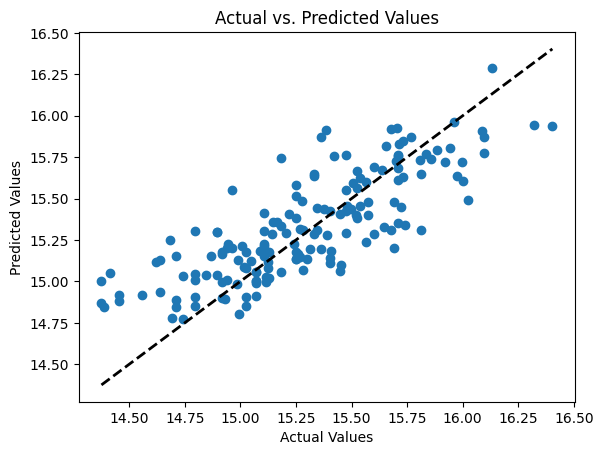

In [ ]:
plt.scatter(y_test, regr_model_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for perfect predictions
plt.show()

Checking out the mean error score changes if I introduce cross-validation. It got slightly worse as I see.

In [ ]:
model_cv_score = LinearRegression()
cv_scores = cross_val_score(model_cv_score, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores:", -cv_scores)
print("Mean CV score:", -cv_scores.mean())

Cross-validation scores: [0.03985316 0.03076302 0.02793442 0.04551175 0.04934263]
Mean CV score: 0.0386809972074066


Selecting only the features that most influence the outcome to only work with those.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=9) # Select top X features
X_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices].tolist()
selected_features

['area',
 'bathrooms',
 'airconditioning_yes',
 'stories',
 'parking',
 'bedrooms',
 'prefarea_yes',
 'mainroad_yes',
 'furnishingstatus_unfurnished']

In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Using only the most influencing features, it increased the model accuracy on the test set.

In [ ]:
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)
model_selected.score(X_train_selected, y_train)

0.6831186029246643

Plotting a bar to see which are the most influencing features, using different method, but the result is roughly the same.

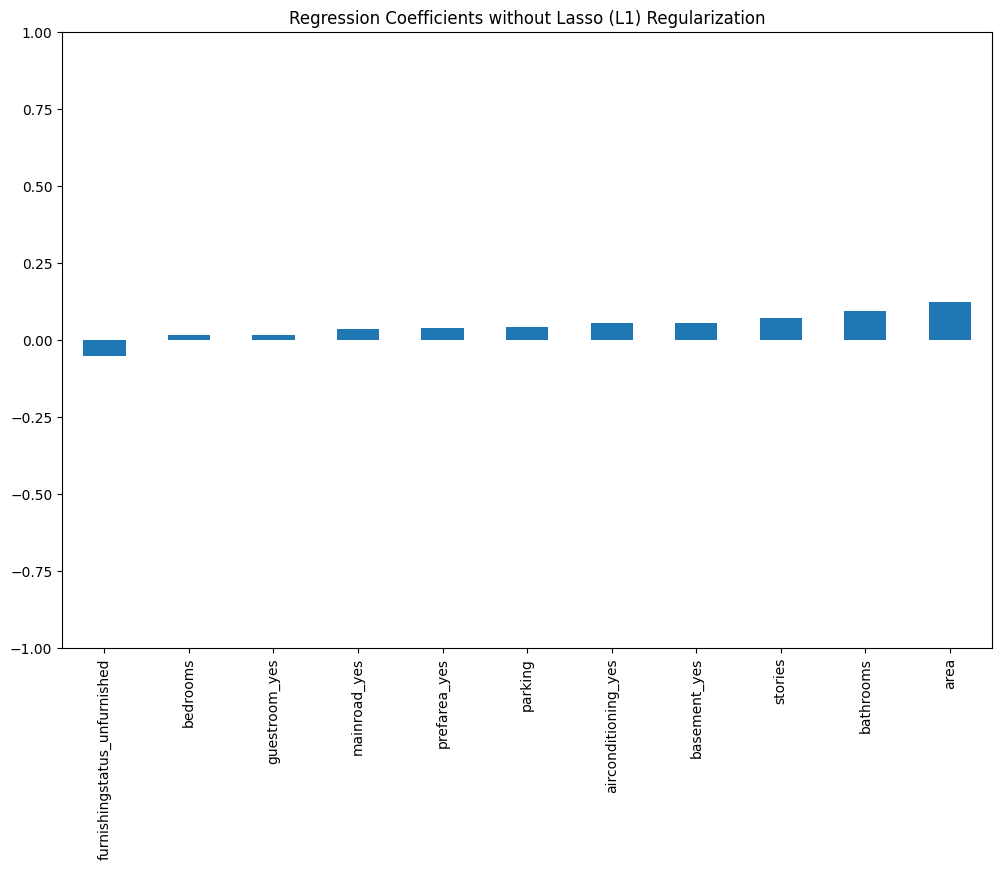

In [ ]:
predictors = X.columns
coef = pd.Series(regr_model.coef_,predictors).sort_values()
plt.figure(figsize = (12,8))
plt.ylim(-1.0,1.0)
coef.plot(kind='bar', title='Regression Coefficients without Lasso (L2) Regularization')
plt.show()

In [ ]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_selected, y_train)
ridge_model_pred_train = ridge_model.predict(X_train_selected)
ridge_model_mse_train = np.mean((ridge_model_pred_train - y_train) ** 2)
print(f'L2 Regularization model training error: {ridge_model_mse_train}')

L2 Regularization model training error: 0.038962587789265334


In [ ]:
ridge_model.score(X_train_selected, y_train)

0.6831171113935365

After using Ridge regularization, the accuracy remained the same as with SelectKBest.

# PROJECT 2: predicting housing prices on a different dataset


In [ ]:
housing = pd.read_csv('/content/drive/MyDrive/Coding_data_files/Housing_advanced.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Meaning of the abbreviations of the dataset:**

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over
25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds
river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks
by town

LSTAT % lower status of the population

**MEDV Median value of owner-occupied homes in $1000's** --> target value

Getting to know the dataset and trying to see if there are null values.

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crime_rate  511 non-null    float64
 1   ZN          511 non-null    float64
 2   INDUS       511 non-null    float64
 3   CHAS        511 non-null    int64  
 4   NOX         511 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         511 non-null    float64
 7   DIS         511 non-null    float64
 8   RAD         511 non-null    int64  
 9   TAX         511 non-null    int64  
 10  PTRATIO     511 non-null    float64
 11  B           511 non-null    float64
 12  LSTAT       511 non-null    float64
 13  MEDV        511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


Summary of the null values across the columns.

In [ ]:
housing.isnull().sum()

,0
Crime_rate,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,5
AGE,0
DIS,0
RAD,0
TAX,0


Filling the null values with the mean of 'RM' column.

In [ ]:
housing['RM'] = housing['RM'].fillna(np.mean(housing['RM']))

# EDA

Analysing the distribution of each feature and target (MEDV) to detect for potential outliers.
Used % to see what % of the whole data of the column belongs to the outlier category.
The average outlier index serves the basis for handling those outliers.

The % outliers of each feature 13.111545988258316


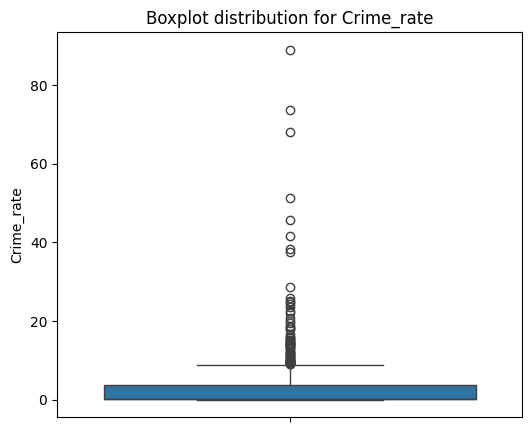

The % outliers of each feature 13.307240704500977


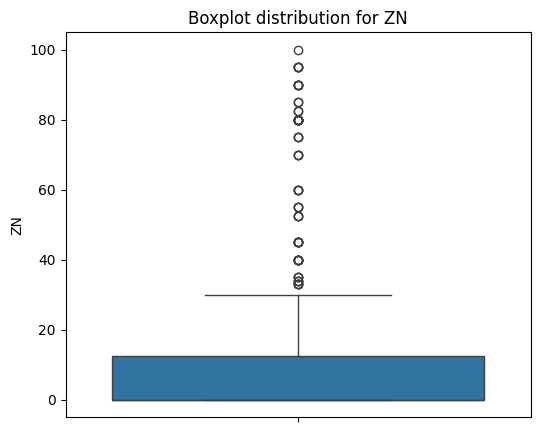

The % outliers of each feature 0.0


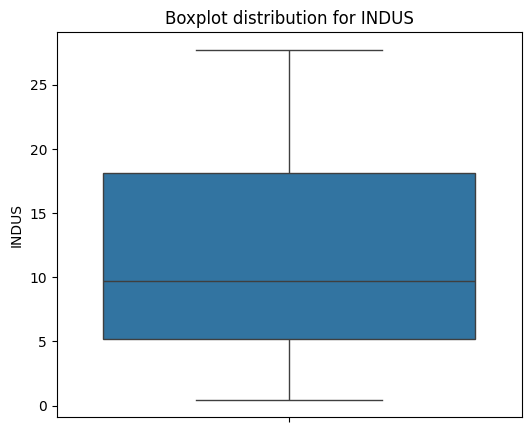

The % outliers of each feature 6.8493150684931505


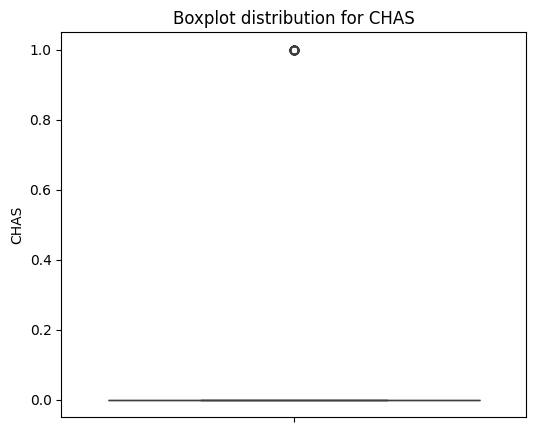

The % outliers of each feature 0.0


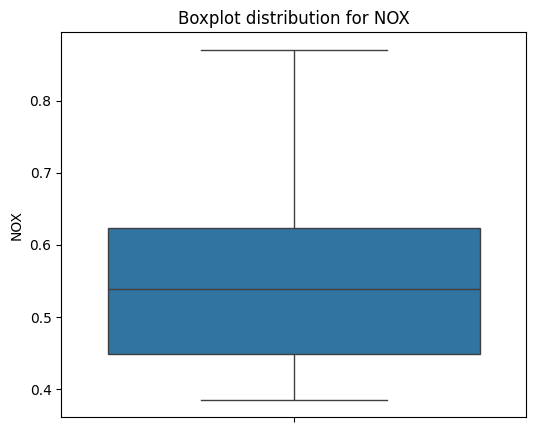

The % outliers of each feature 5.870841487279844


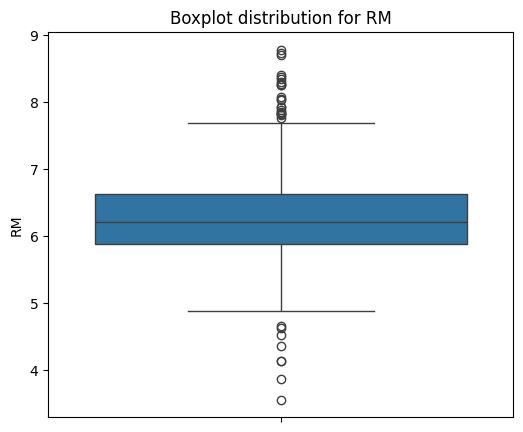

The % outliers of each feature 0.0


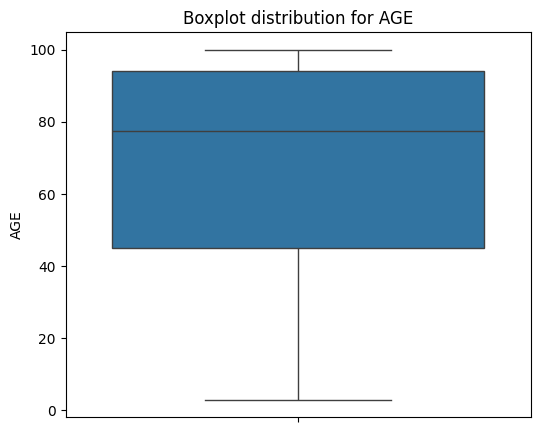

The % outliers of each feature 0.9784735812133072


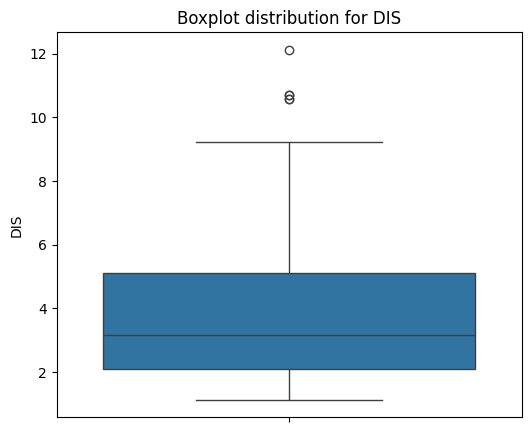

The % outliers of each feature 0.0


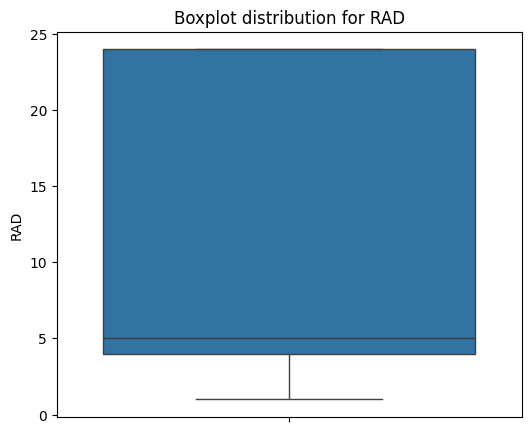

The % outliers of each feature 0.0


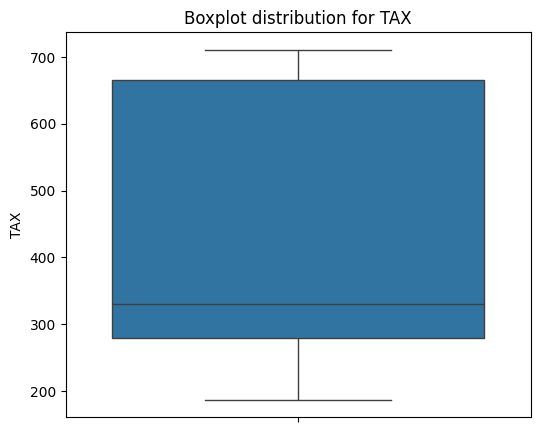

The % outliers of each feature 2.935420743639922


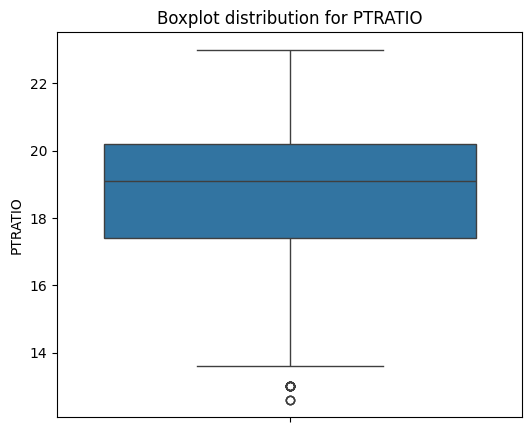

The % outliers of each feature 14.87279843444227


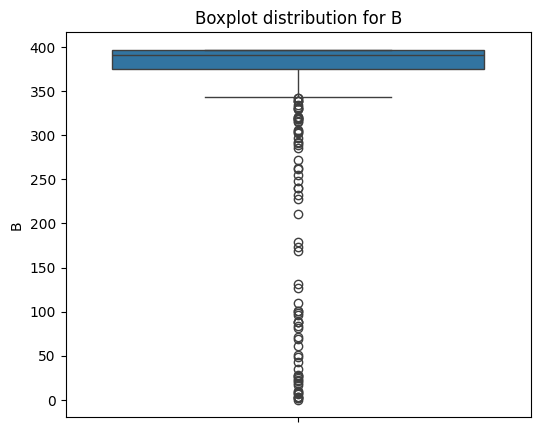

The % outliers of each feature 1.5655577299412915


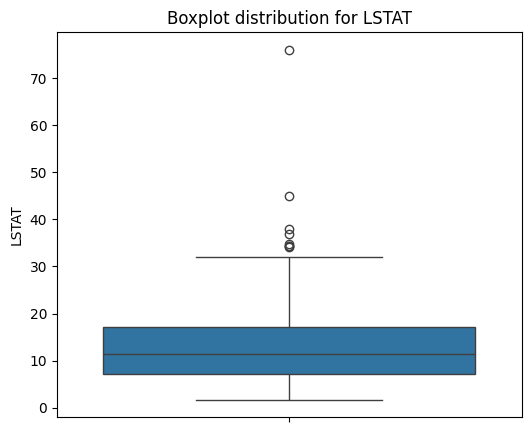

The % outliers of each feature 8.21917808219178


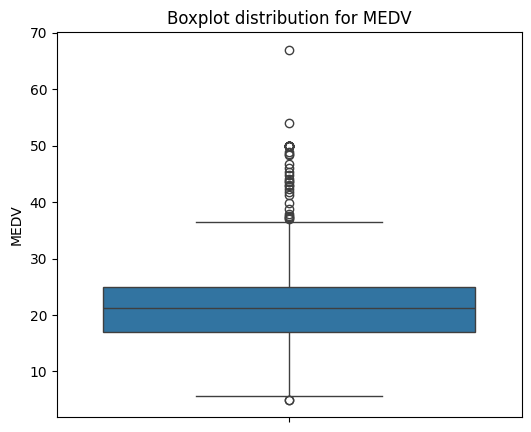

Average % of outliers of all features 8.21917808219178


In [ ]:
# Univariate distributions

for col in housing.columns:
  plt.figure(figsize=(6,5))
  sns.boxplot(data=housing[col])
  plt.title(f'Boxplot distribution for {col}')
  Q1 = housing[col].quantile(0.25)
  Q3 = housing[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  inter_quantile = housing[(housing[col] < lower_bound) | (housing[col] > upper_bound)][col].values
  print(f'The % outliers of each feature {(len(inter_quantile)/len(housing))*100}')
  plt.show()
print(f'Average % of outliers of all features {np.mean((len(inter_quantile)/len(housing))*100)}')

This section is to analyse the skewness of the data.

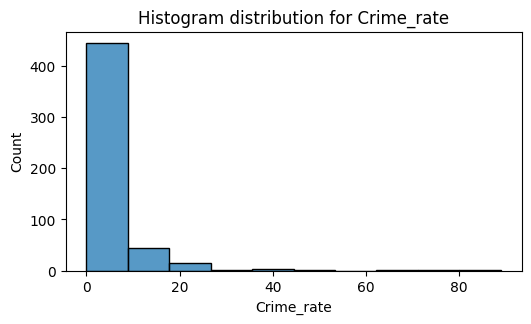

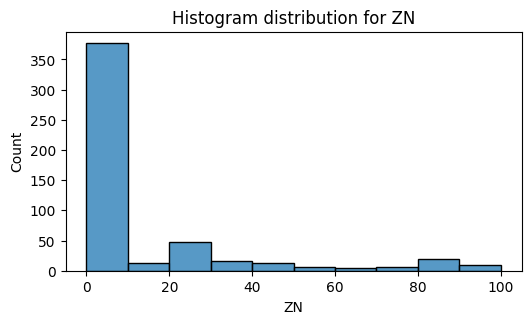

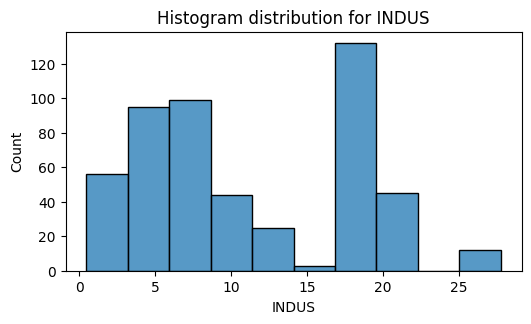

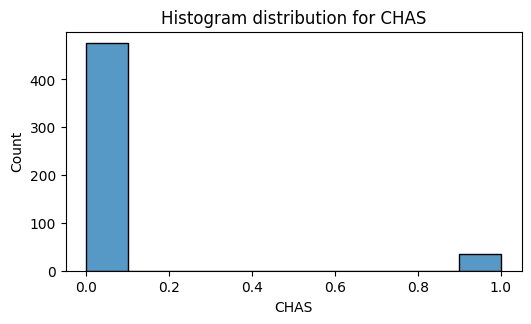

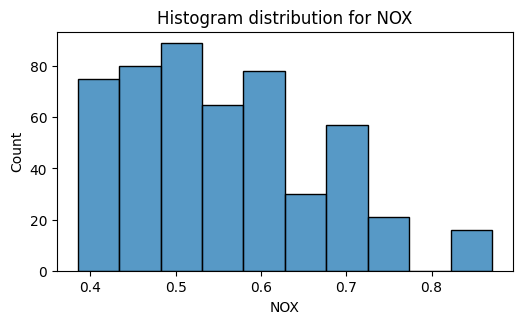

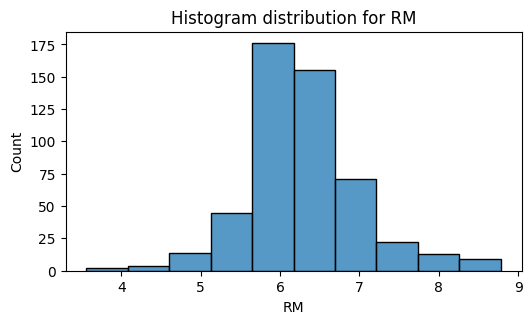

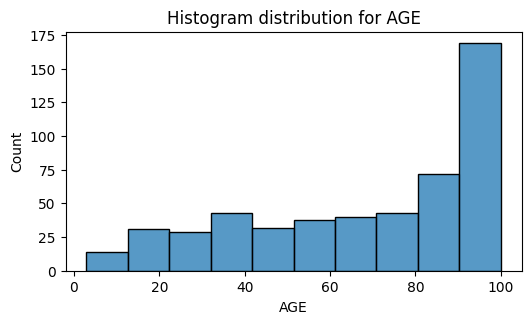

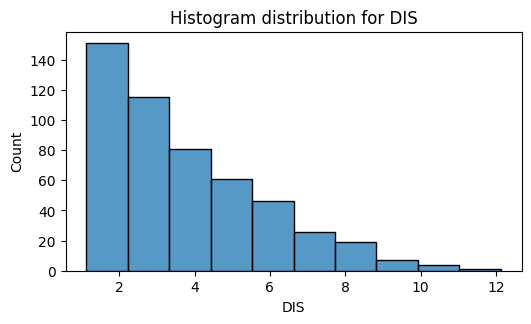

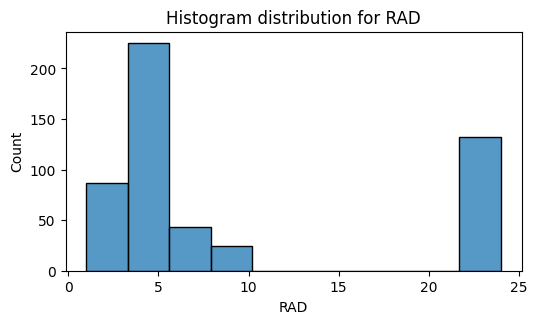

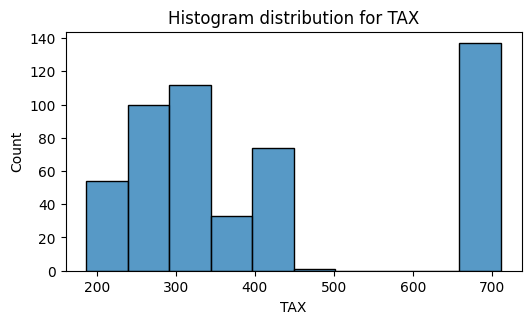

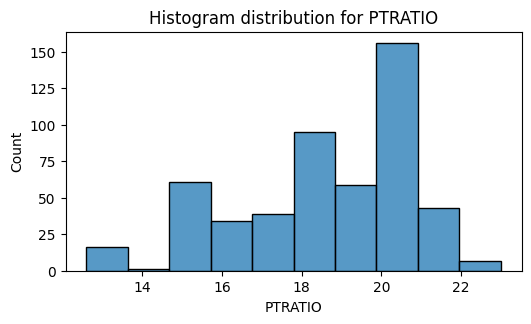

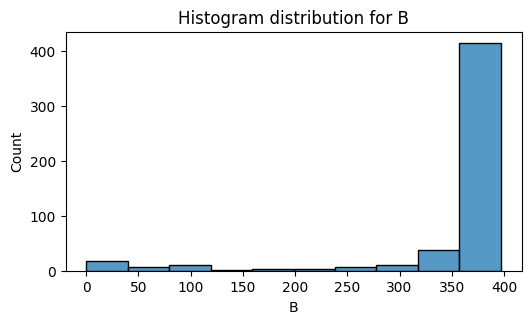

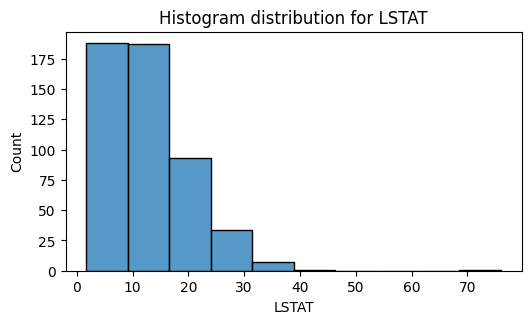

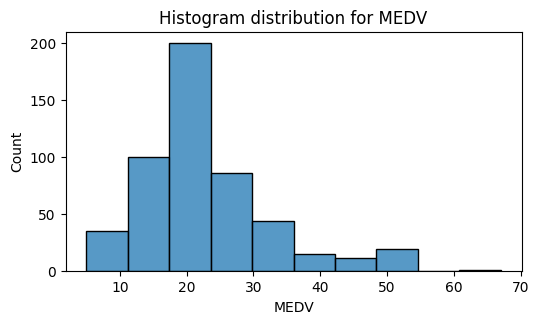

In [ ]:
i = 1
for col in housing.columns:
  plt.figure(figsize=(20,18))
  plt.subplot(5,3,i)
  sns.histplot(data=housing[col], bins=10)
  plt.title(f'Histogram distribution for {col}')
  plt.show()
  i +=1

To understand the rough distribution of the target value.

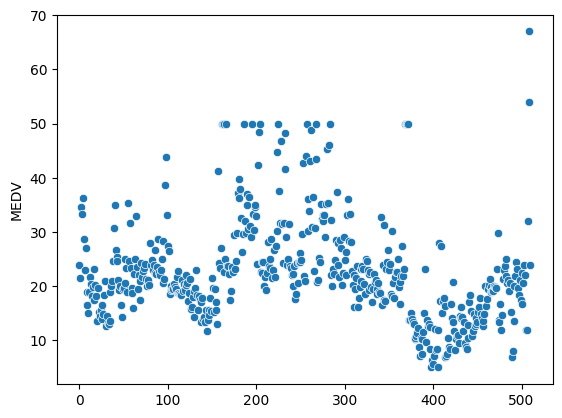

In [ ]:
sns.scatterplot(data=housing['MEDV'])
plt.show()

EDA Part2

This section is to understand how other features can relate to the target variable

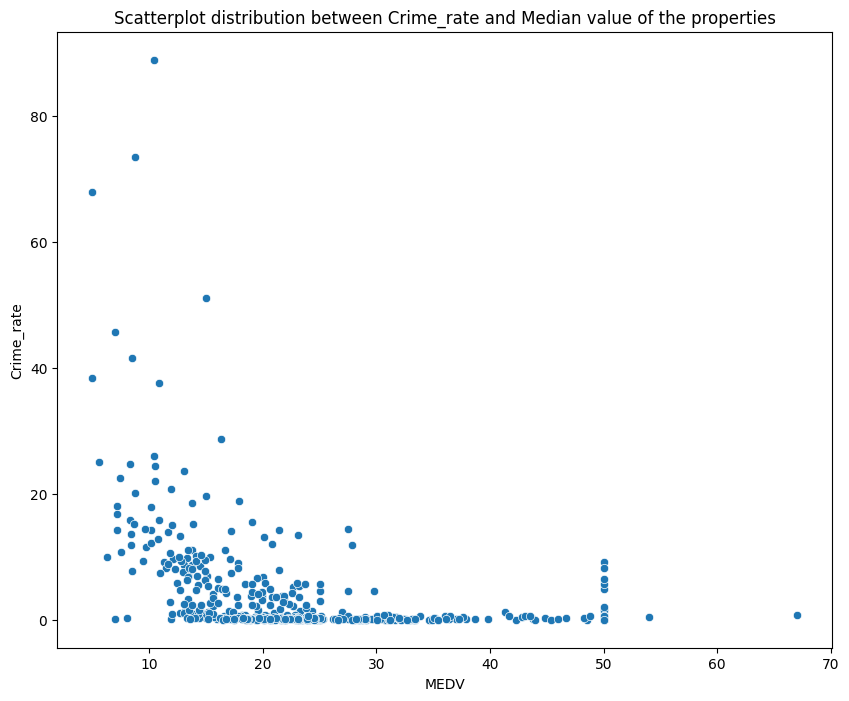

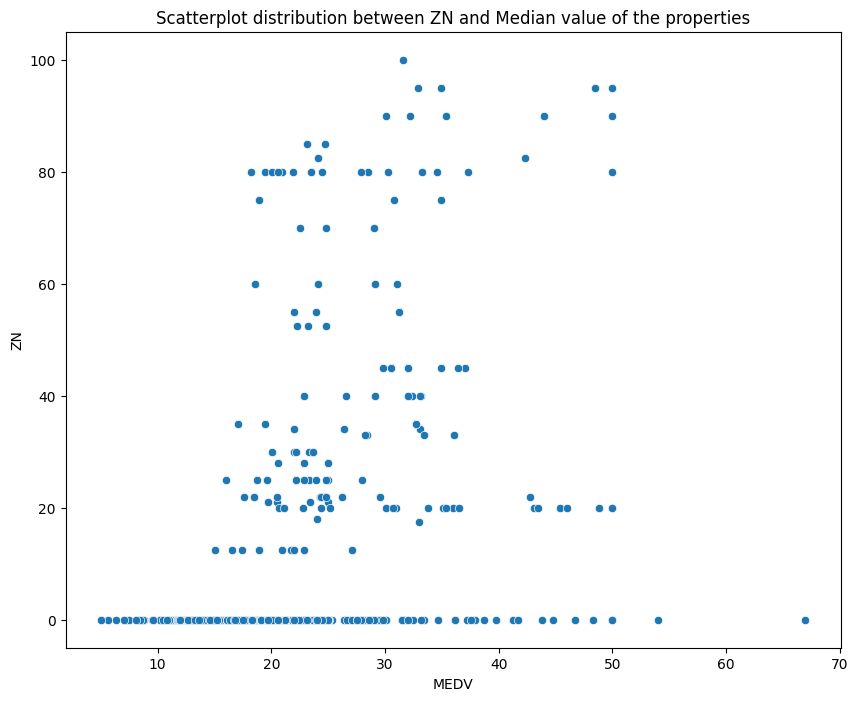

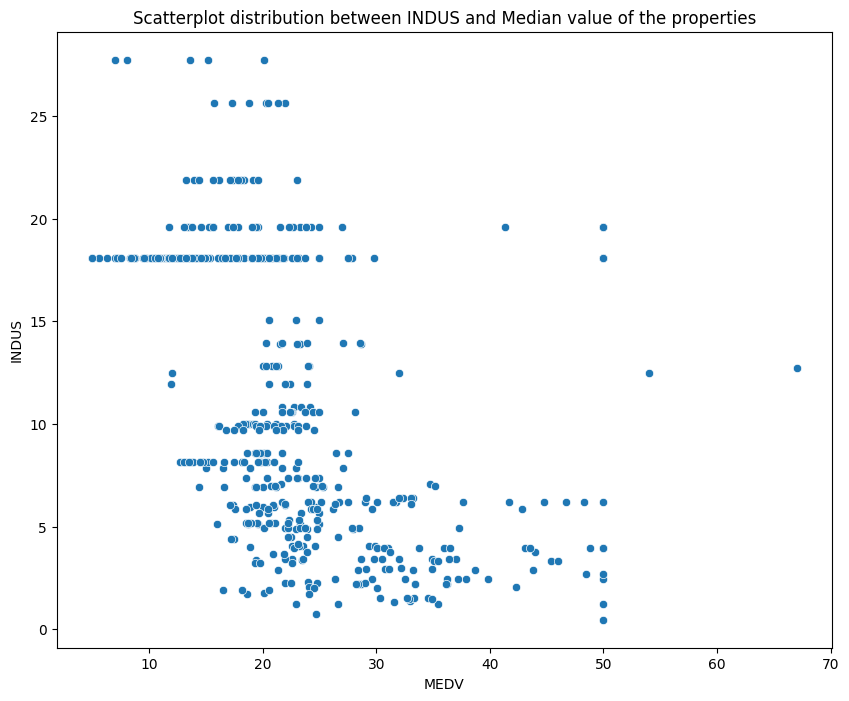

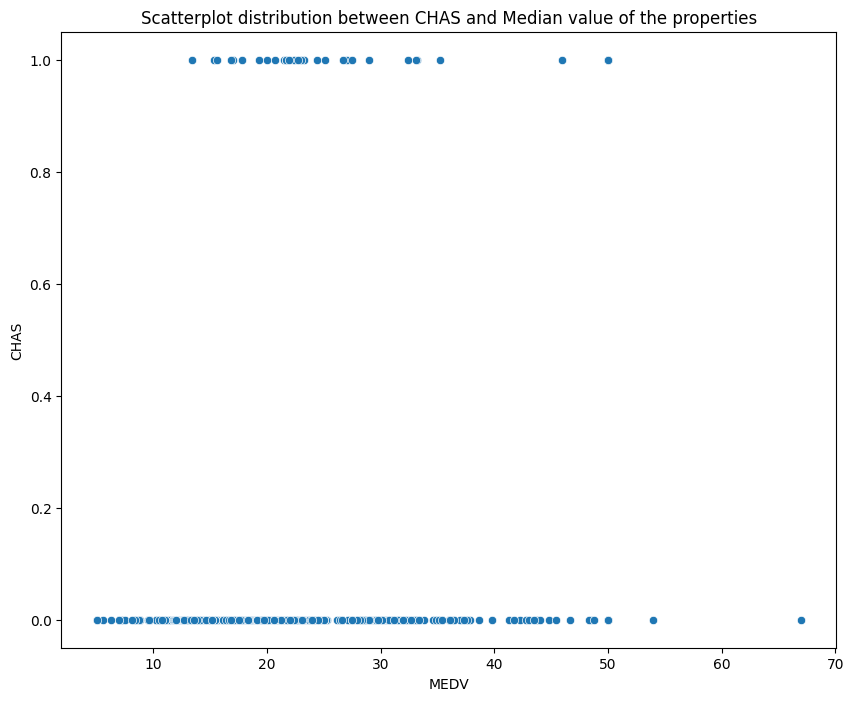

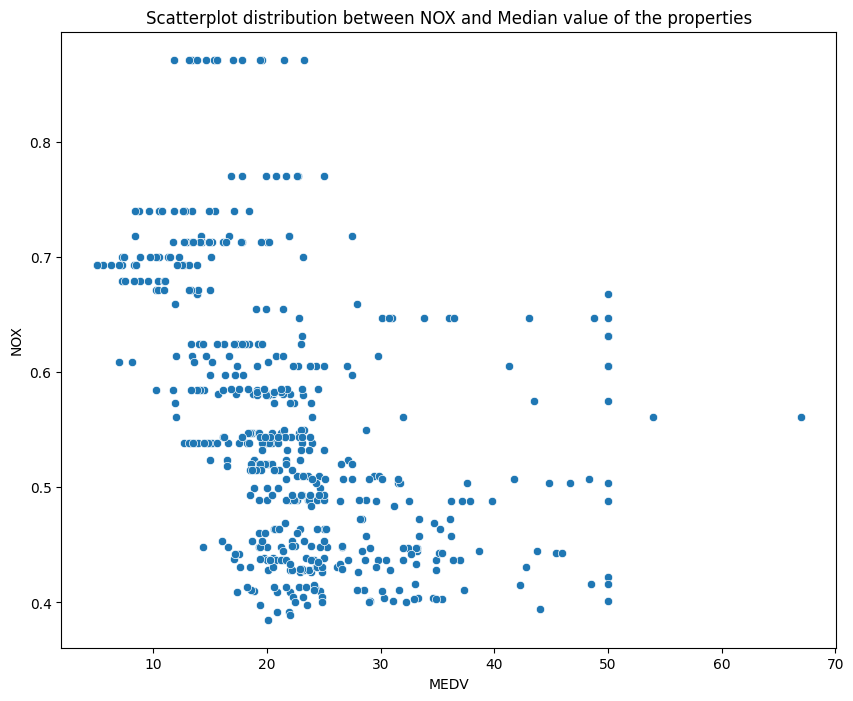

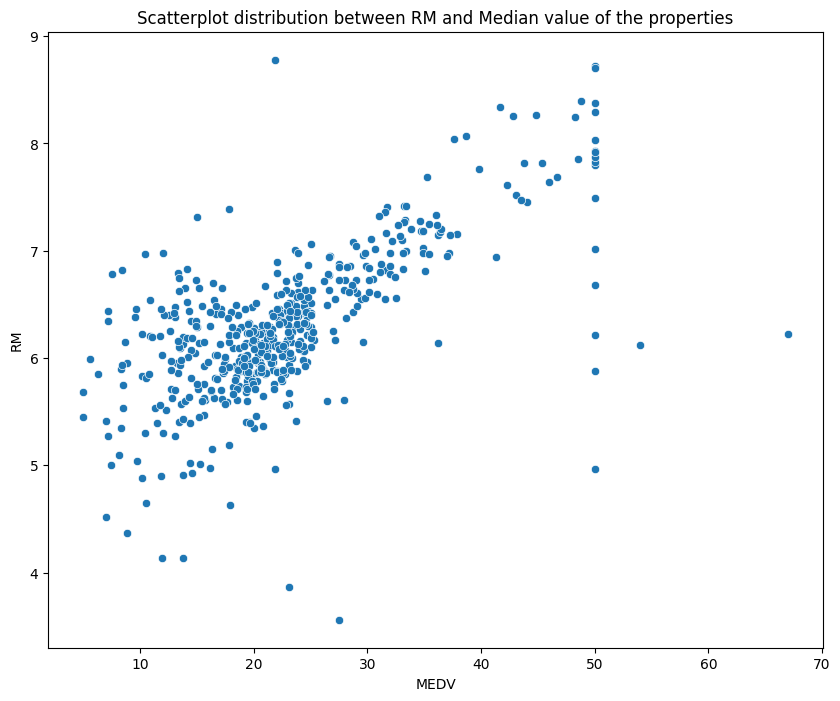

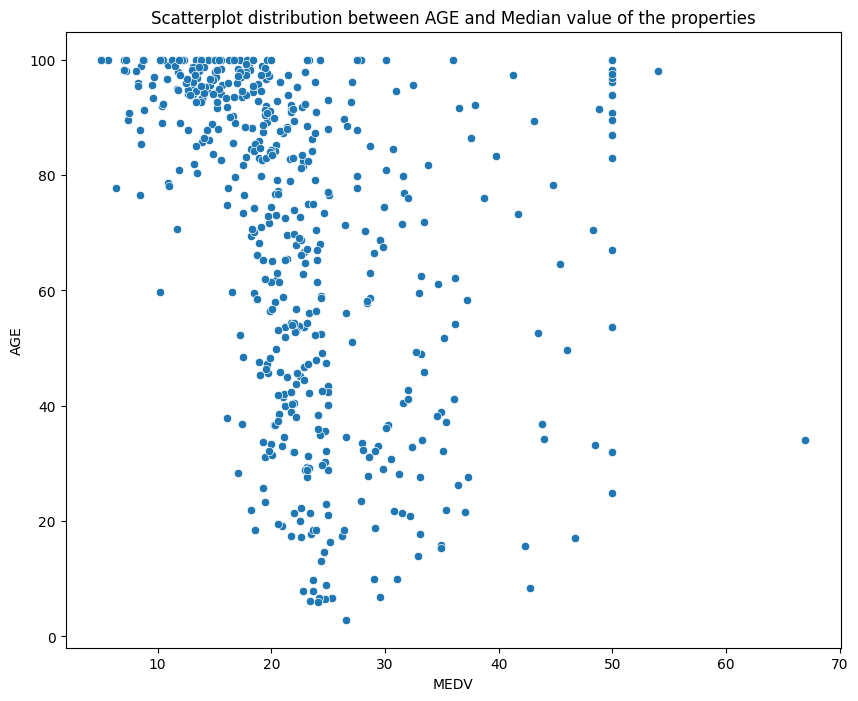

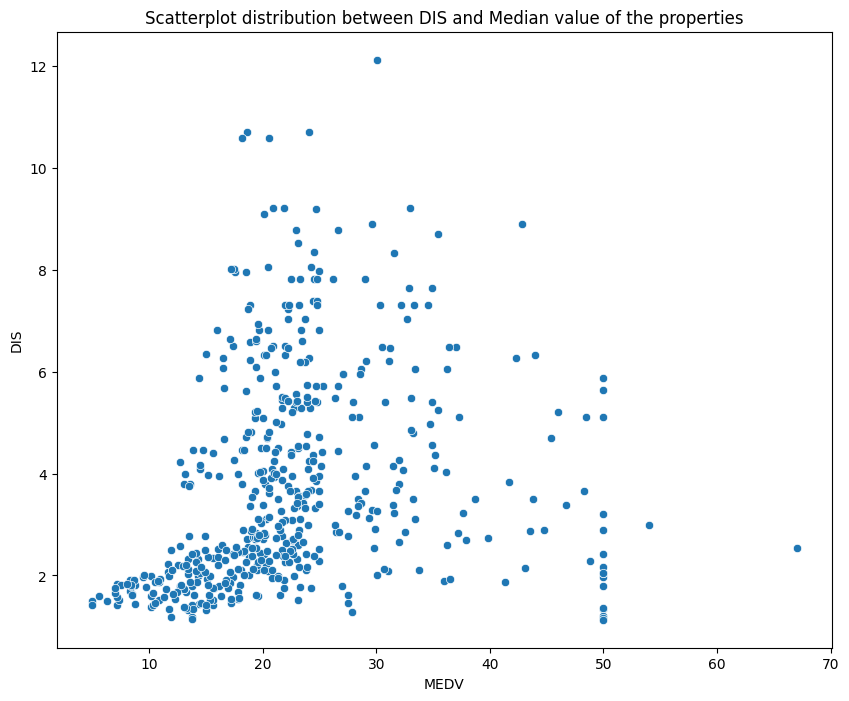

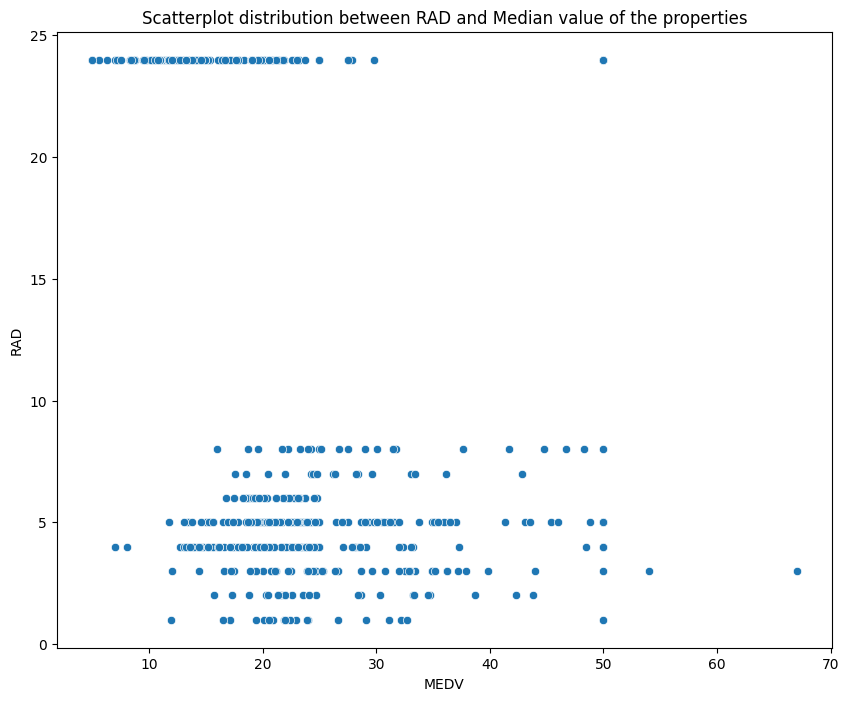

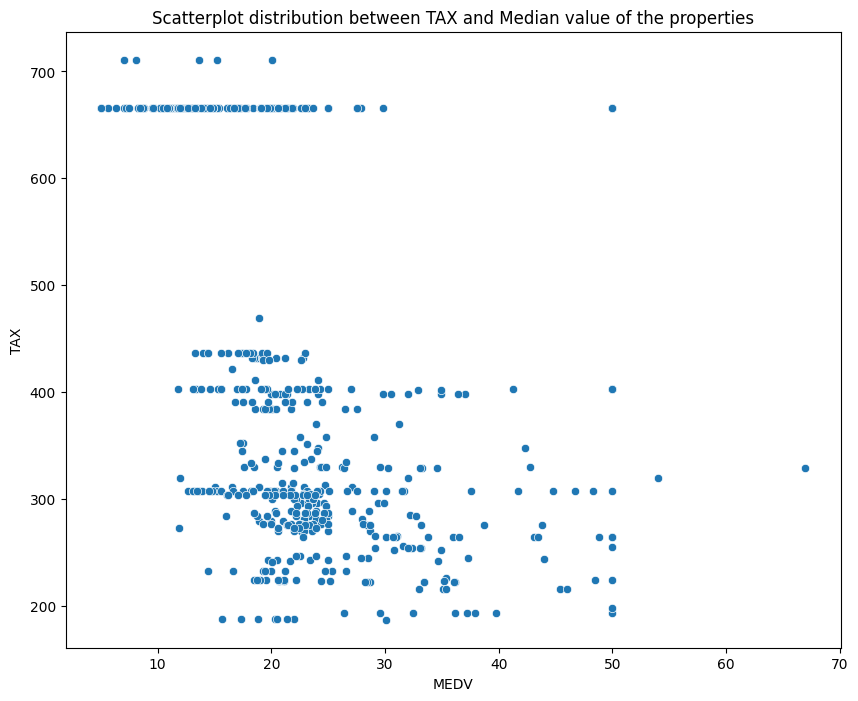

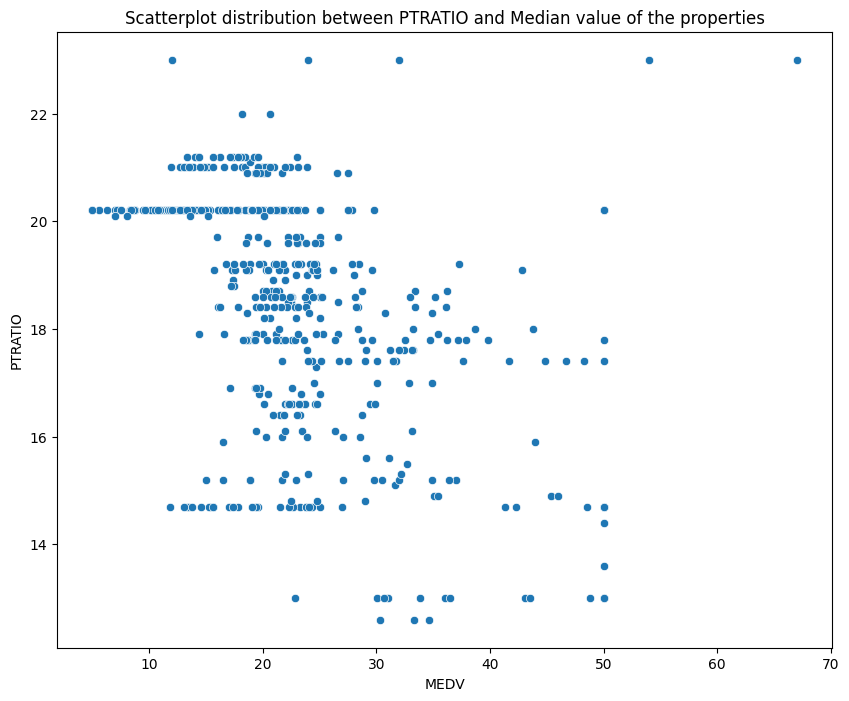

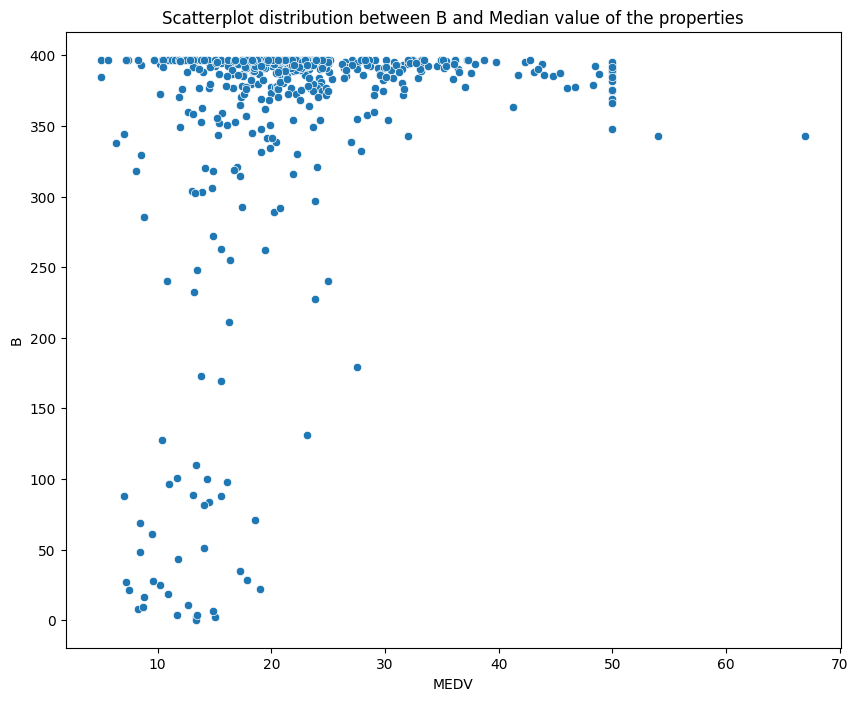

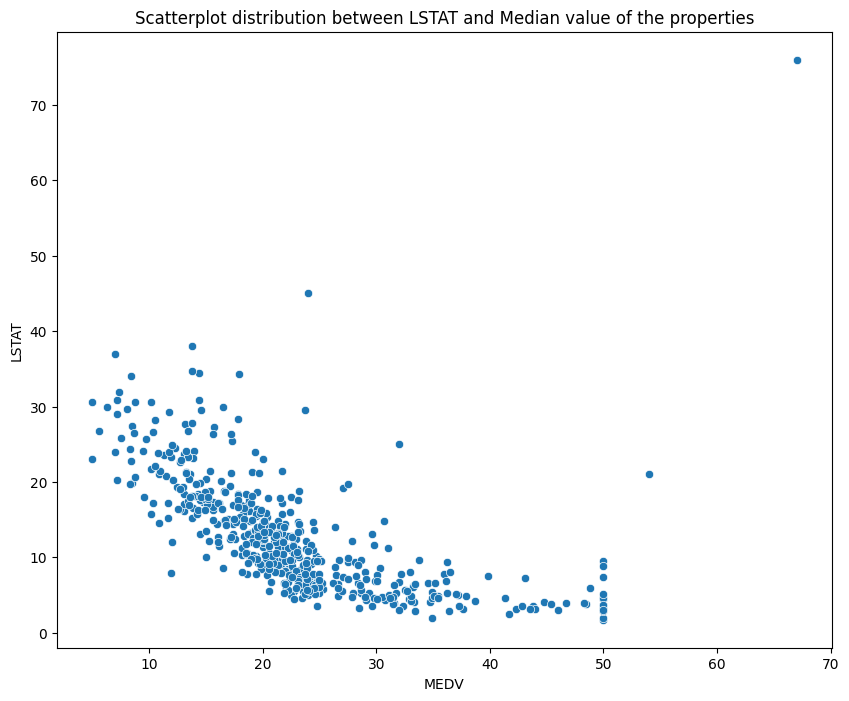

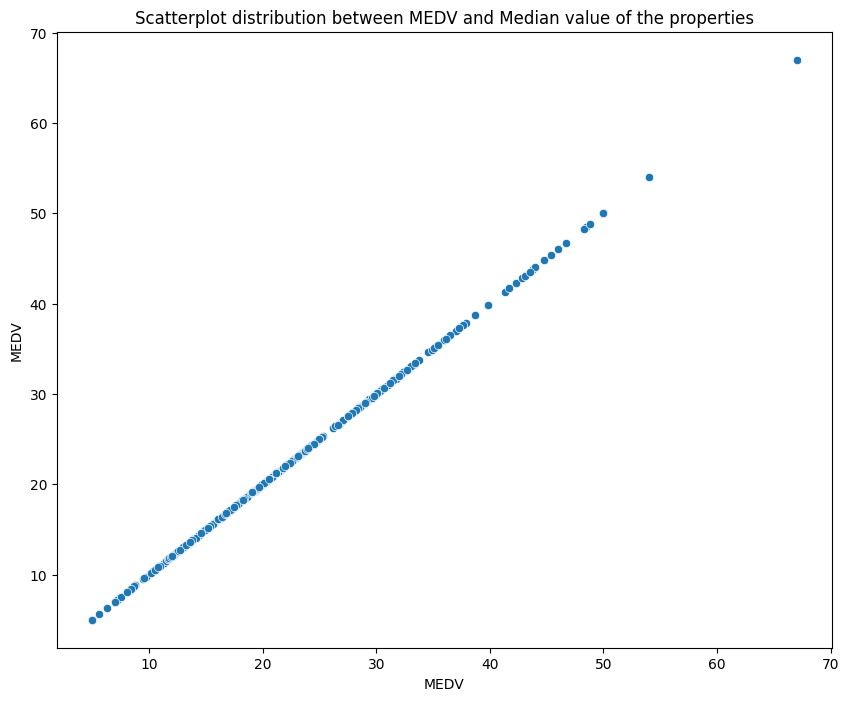

In [ ]:
# Bivariate distributions

for col in housing.columns:
  plt.figure(figsize=(10,8))
  sns.scatterplot(data=housing, x='MEDV', y=col)
  plt.title(f'Scatterplot distribution between {col} and Median value of the properties')
  plt.xlabel('MEDV')
  plt.ylabel(col)
  plt.show()

EDA Part3

This section is to understand how each point is correlated to each other, primarily to the target variable. After this, the top influential factors of MEDVA were uncovered.

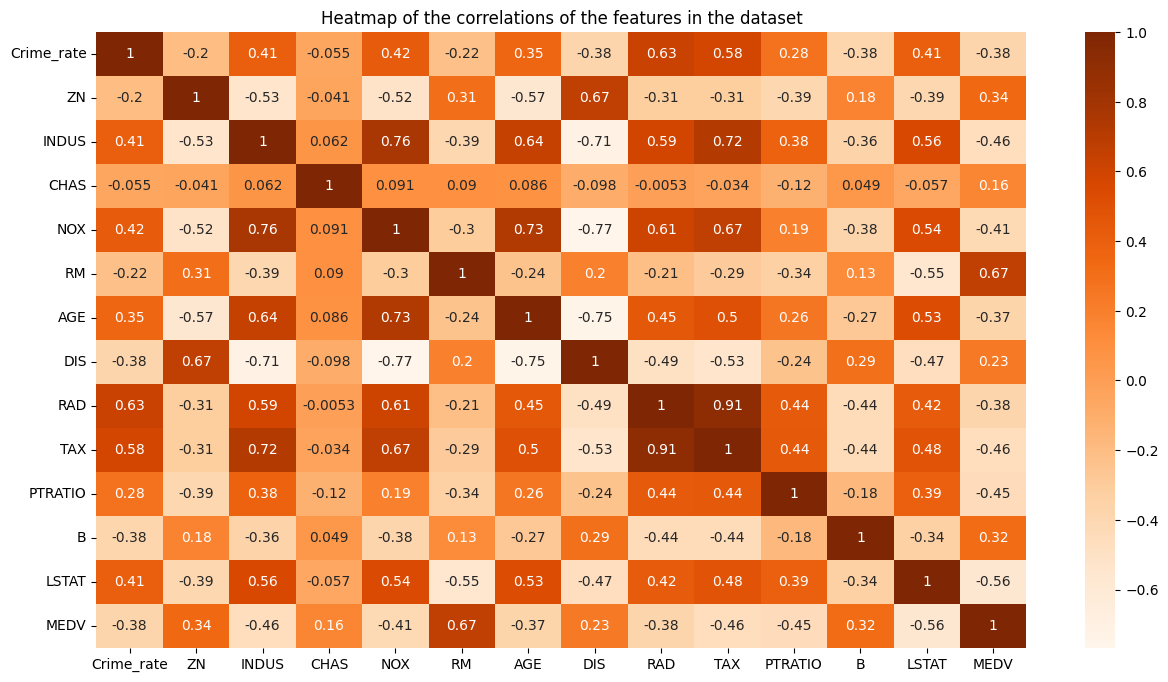

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(housing.corr(),annot=True,cmap='Oranges',cbar=True)
plt.title('Heatmap of the correlations of the features in the dataset')
plt.show()

In [ ]:
correlated_features = housing.corr()['MEDV'].abs().sort_values(ascending=False)
print(correlated_features)

MEDV          1.000000
RM            0.666954
LSTAT         0.562960
INDUS         0.463269
TAX           0.459274
PTRATIO       0.447464
NOX           0.411486
Crime_rate    0.380072
RAD           0.379016
AGE           0.368203
ZN            0.339767
B             0.317941
DIS           0.233469
CHAS          0.164782
Name: MEDV, dtype: float64


Initiating the preprocessing phase with splitting the data into training and test set.

In [ ]:
X = housing.drop('MEDV', axis=1)
y = housing['MEDV']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

Scaling the data to ensure closely places number and avoiding values to stand out too much

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)


This function reshapes the values of the outliers to 5% and 94%.

In [ ]:
from scipy.stats.mstats import winsorize

for col in x_train.columns:
  X_train[col] = winsorize(X_train[col], limits=(.05, .06))
  X_test[col] = winsorize(X_test[col], limits=(.05, .06))

Training the Linear Regression model with cross-validation.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Accuracy score of the Linear Regression model on training data: ')
lr.score(X_train, y_train)

Accuracy score of the Linear Regression model on training data: 


0.7083291457080777

In [ ]:
print('CV scores of the model', cv_scores)

CV scores of the model [-16.74390986 -45.28181648 -32.37851334 -34.28433392 -17.0835167
 -30.83276478]


Predicting the values of the test set and calculating the MSE and R2 (since this to be commonly used for Linear Regressions).

*MSE*: shows how far each point is from the line (placed on square)

*R2*: indicates the proportion of data points which lie within the line created by the regression equation (the higher, the better)

In [ ]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 50.12
R-squared (R2): 0.42


To find the parameters Random Search and Grid Search should be looking for.

In [ ]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

This model randomly goes through the potential hyperparameters to find the most optimal one for our model.

The second goes through every possible value within the range to find the most optimal hyperparameter.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

lr_random_search = RandomizedSearchCV(lr, param_space, n_iter=100, cv=5)
lr_random_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {lr_random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {lr_random_search.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 0.6818122426343296


In [ ]:
from sklearn.model_selection import GridSearchCV

param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

lr_grid_search = GridSearchCV(lr, param_space, cv=5)
lr_grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {lr_grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {lr_grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.6818122426343296


This is an attempt for regularization to reduce overfitting of the model that was seen on the weak performance on the training data. But it seemed to perform worse.

Ridge was used, not Lasso, since I do not want to eliminate certain features as there are already not many.

In [ ]:
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge = Ridge()
grid_search = RandomizedSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_ridge_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best negative MSE: {best_score:.2f}')

Best parameters: {'alpha': 1}
Best negative MSE: -28.67


In [ ]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
print('Accuracy score of the L2 REgularization model on test data: ')
ridge.score(X_test, y_test)

Accuracy score of the L2 REgularization model on test data: 


0.4149757125443053

In [ ]:
y_pred_best = best_ridge_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Test MSE (Best Model): {mse_best:.2f}')
print(f'Test R2 (Best Model): {r2_best:.2f}')

Test MSE (Best Model): 50.14
Test R2 (Best Model): 0.41


This section is an ensemble model to reduce the high variance, overfitting, of the model.

In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_lr = BaggingRegressor(LinearRegression(), n_estimators=10, max_features=10)
bag_lr.fit(X_train, y_train)
print('Accuracy score of Logistic Regression, 10 estimators:')
bag_accuracy_lr = bag_lr.score(X_test, y_test)
print(bag_accuracy_lr)

Accuracy score of Logistic Regression, 10 estimators:
0.37665705230439517


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 11.6 MB/s eta 0:00:00




**Quick info about Optuna:**



*   Facilitates hyperparameter optimization for various models, including ANN
*   Primarily used for Deep Learning

**Objective Function:** This is the function you define that takes a trial (a set of hyperparameters suggested by Optuna) and returns the metric you want to optimize (e.g., cross-validation score). Optuna will try to minimize or maximize this value.

**Trial:** A single run of your model with a specific set of hyperparameters suggested by Optuna.

**Study:** Represents the overall optimization process. It manages multiple trials and keeps track of the best hyperparameters found so far.

**Suggestion:** Optuna's mechanism for proposing new hyperparameter values for each trial. It supports various search spaces (e.g., discrete choices, ranges for integers or floats).



This hyperoptimization framework was used to, again, find the most optimal hyperparameter. This served as an experience to try out new things.

In [ ]:
import optuna

def objective(trial):
    # this part specifies the parameters of the estimator model: I use Ridge, so only 'alpha'
    alpha = trial.suggest_float('alpha', 1e-5, 20) # suggest_float(name, low, high, *, step=None, log=False), if log is True then it samples from the log domain

    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = mean_squared_error(y_test, y_pred)
    return accuracy

# Perform hyperparameter optimization with Optuna
# Creates a study object where the optimization direction is set to 'minimize' (we want to minimize the loss)
# Runs the optimization process with 1 trial, calling the objective function each time with different hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=15)

# Print the best hyperparameters and corresponding accuracy
best_alpha = study.best_params['alpha']
best_accuracy = study.best_value
print("Best Alpha:", best_params)
print("Best Accuracy:", best_accuracy)

# Use the best model for predictions
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the performance on the test set
accuracy = mean_squared_error(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

[I 2025-04-26 17:42:37,168] A new study created in memory with name: no-name-250790c2-f6d0-42a5-8539-20005ab8570c
[I 2025-04-26 17:42:37,181] Trial 0 finished with value: 50.27331607933955 and parameters: {'alpha': 9.589750839972417}. Best is trial 0 with value: 50.27331607933955.
[I 2025-04-26 17:42:37,192] Trial 1 finished with value: 50.23035229085995 and parameters: {'alpha': 6.389713698214701}. Best is trial 1 with value: 50.23035229085995.
[I 2025-04-26 17:42:37,200] Trial 2 finished with value: 50.35699569336301 and parameters: {'alpha': 19.37574813706719}. Best is trial 1 with value: 50.23035229085995.
[I 2025-04-26 17:42:37,208] Trial 3 finished with value: 50.20636778895319 and parameters: {'alpha': 4.863054192239285}. Best is trial 3 with value: 50.20636778895319.
[I 2025-04-26 17:42:37,216] Trial 4 finished with value: 50.2009455026139 and parameters: {'alpha': 4.535917449703622}. Best is trial 4 with value: 50.2009455026139.
[I 2025-04-26 17:42:37,226] Trial 5 finished wit

Best Alpha: {'n_estimators': 113, 'max_depth': 6, 'learning_rate': 0.025586265314995953, 'subsample': 0.5407071488942142, 'colsample_bytree': 0.954968815585671, 'random_state': 185}
Best Accuracy: 50.12230882503055
Test Set Accuracy: 50.12230882503055
